# Supervised Learning with Python: Classification

We will use _iris_ dataset in this Notebook.

Outline:
* Exploring the Data
* Classification with _sklearn_
  - _k_-Nearest Neighbors
  - Model Performance

## Exploring the Data

In [5]:
# Import necessary modules
from sklearn import datasets

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [6]:
# Load iris dataset
iris = datasets.load_iris()

type(iris)

sklearn.utils.Bunch

In [7]:
# Print the keys of the iris dataset
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


The dataset is seperated into two parts.
1. Independent variables (or features)
2. Response variable (or target)

In [8]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

Iris dataset consists of 4 independent variables. 

In [9]:
# Compare the shapes of the features and the target
iris.data.shape, iris.target.shape

((150, 4), (150,))

The response variable has three levels: 'setosa', 'versicolor', and 'virginica'.

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# Create a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Print the head of the df
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


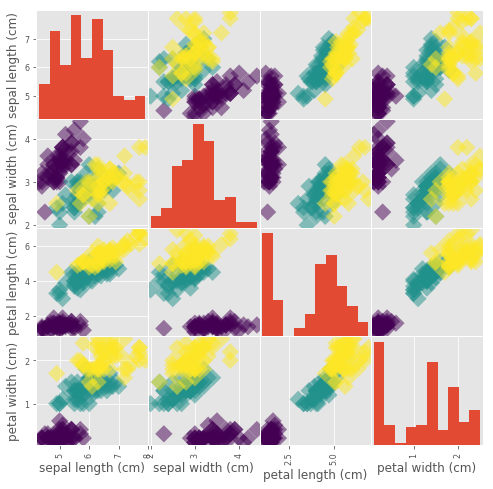

In [12]:
# Use 'ggplot' style
plt.style.use('ggplot') # With `ggplot` we can get better graphs.

# Plot scatter matrix
pd.plotting.scatter_matrix(df, c = iris.target, figsize = [8, 8], s = 150, marker = 'D')
plt.show()

Scatter plot of the petal_length and the petal_width with _seaborn_. 

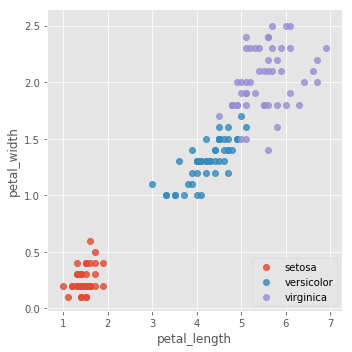

In [13]:
import seaborn as sns

# Load iris dataset from seaborn library
df_iris = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="petal_length", y="petal_width", data=df_iris, fit_reg=False, hue='species', legend=False)
 
# Move the legend to the lower right
plt.legend(loc='lower right')
 
#sns.plt.show()


I'd like to investigate the data in R as well :)

In [14]:
# Load in the R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [15]:
%%R

data(iris)
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


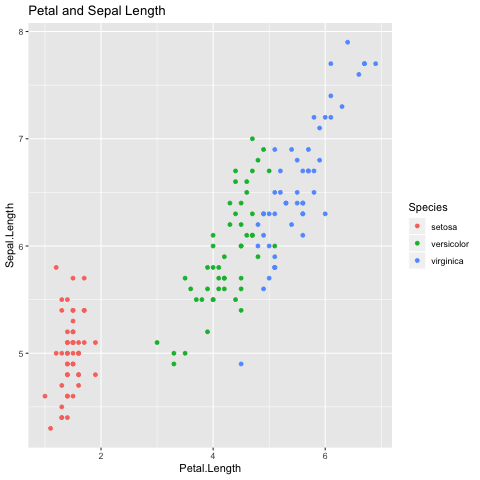

In [16]:
%%R

# Plot the graph: petal length vs sepal length
library('ggplot2')
ggplot(iris, aes(x = Petal.Length, y = Sepal.Length, colour = Species)) + 
  geom_point() +
  ggtitle('Petal and Sepal Length')

## Classification with _sklearn_

Feature and target variable arrays are required for scikit-learn API. Note that the iris data is stored as a Numpy array. If this were not the case, we would need to create arrays from the pandas DataFrame using `.values` attribute.

In [19]:
X = iris.data
y = iris.target

It is important to split data into training and test sets! `.train_test_split` splits arrays or matrices into random train and test subsets. Default `test_size` is 0.25, which is the proportion of the test set to the original data. `random_state` is the seed used by the random number generator (for reproductibility).

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

###  _k-Nearest Neighbors_

Fitting a k-NN classifier to the training data, we'll try to predict the label of a data point by looking at the $k$ nearsest (closest) data points.

In [21]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

There are 3 labels of the _target_: setosa, versicolor, virginica. These labels are represented as 0, 1 and 2 respectively.

In [22]:
# Predict the labels for the test data X_test
y_pred = knn.predict(X_test)

# Print the predictions (labels)
print("Predictions:\n {}".format(y_pred))

Predictions:
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 2 2 1 1 0 2 0]


### Model Performance

**Accuracy**, a key measure of performance, is the proportion of correct predictions out of all predictions. We use `.score()` method of the model to check out the accuracy.

In [52]:
# Print the accuracy
knn.score(X_test, y_test)

0.9666666666666667

`n_neighbors=7` might not be the best value to choose. Let's look at the other options.

In [53]:
# Setup arrays to store train and test accuracies
n = 10
num_neighbors = np.arange(1, n)
test_acc = np.empty(len(num_neighbors))

# Compute accuracies for different k values
for i, k in enumerate(num_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

Text(0,0.5,'Accuracy')

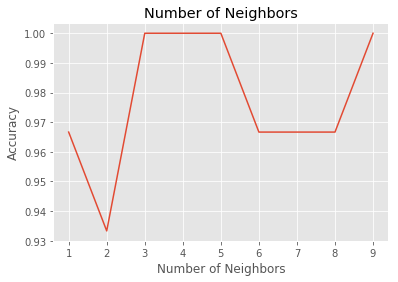

In [54]:
plt.title('Number of Neighbors')
plt.plot(num_neighbors, test_acc)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
